# Creating Study Area Map for Drought Paper
Date: April 12, 2020

In this notebook, we will gradually develop spatial map for the Drought Paper Study Chapter.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np

In [2]:
cd D:/medium/geo_spatial/

D:\medium\geo_spatial


In [3]:
point_path = 'D:/medium/geo_spatial/'
point_fname = 'Dams_Barrages_Headworks.shp'
gdf_head = gpd.read_file(point_path + point_fname)
gdf_head = gdf_head.to_crs(epsg=4326)
#print(gdf_head)
nodes = ['MARALA-B', 'MANGLA-R', 'TARBELA-R', 'JINNAH-B']
gdf_head = gdf_head[gdf_head['NODEIBMR'].isin(nodes)]

gdf_head.reset_index(inplace=True)
gdf_head.at[3,'NETNODEIBM'] = "Nowshera"

gdf_head.at[3,'geometry'] = Point(72, 34)

#gdf_head.reset_index(inplace=True)
gdf_head.at[4,'NETNODEIBM'] = "Mangla Reservoir"

gdf_head.at[4,'geometry'] = Point(73.6667,33.16)


gdf_head.at[5,'NETNODEIBM'] = "Tarbela Reservoir"

gdf_head.at[5,'geometry'] = Point( 72.8050,34.16)
gdf_head = gdf_head.to_crs(epsg=3857)
print(gdf_head)

gdf_marala = gdf_head[gdf_head['NODEIBMR']=='MARALA-B']
gdf_marala.at[0,'NETNODEIBM'] = 'Marala Barrage'
 
gdf_mangla = gdf_head[gdf_head['NETNODEIBM']=='Mangla Reservoir']

gdf_tarbela = gdf_head[gdf_head['NETNODEIBM']=='Tarbela Reservoir']

gdf_nowshera = gdf_head[gdf_head['NETNODEIBM']=='Nowshera']


   index  OBJECTID CATEGORIES  NODEIBMR         NETNODEIBM  \
0    9.0      13.0   Barrages  MARALA-B     MARALA BARRAGE   
1   12.0      41.0   Barrages  JINNAH-B     JINNAH BARRAGE   
3    NaN       NaN        NaN       NaN           Nowshera   
4    NaN       NaN        NaN       NaN   Mangla Reservoir   
5    NaN       NaN        NaN       NaN  Tarbela Reservoir   

                          geometry  
0  POINT (8289981.710 3851525.835)  
1  POINT (7962213.596 3884294.817)  
3  POINT (8015003.337 4028802.026)  
4  POINT (8200539.532 3916560.595)  
5  POINT (8104615.527 4050306.404)  


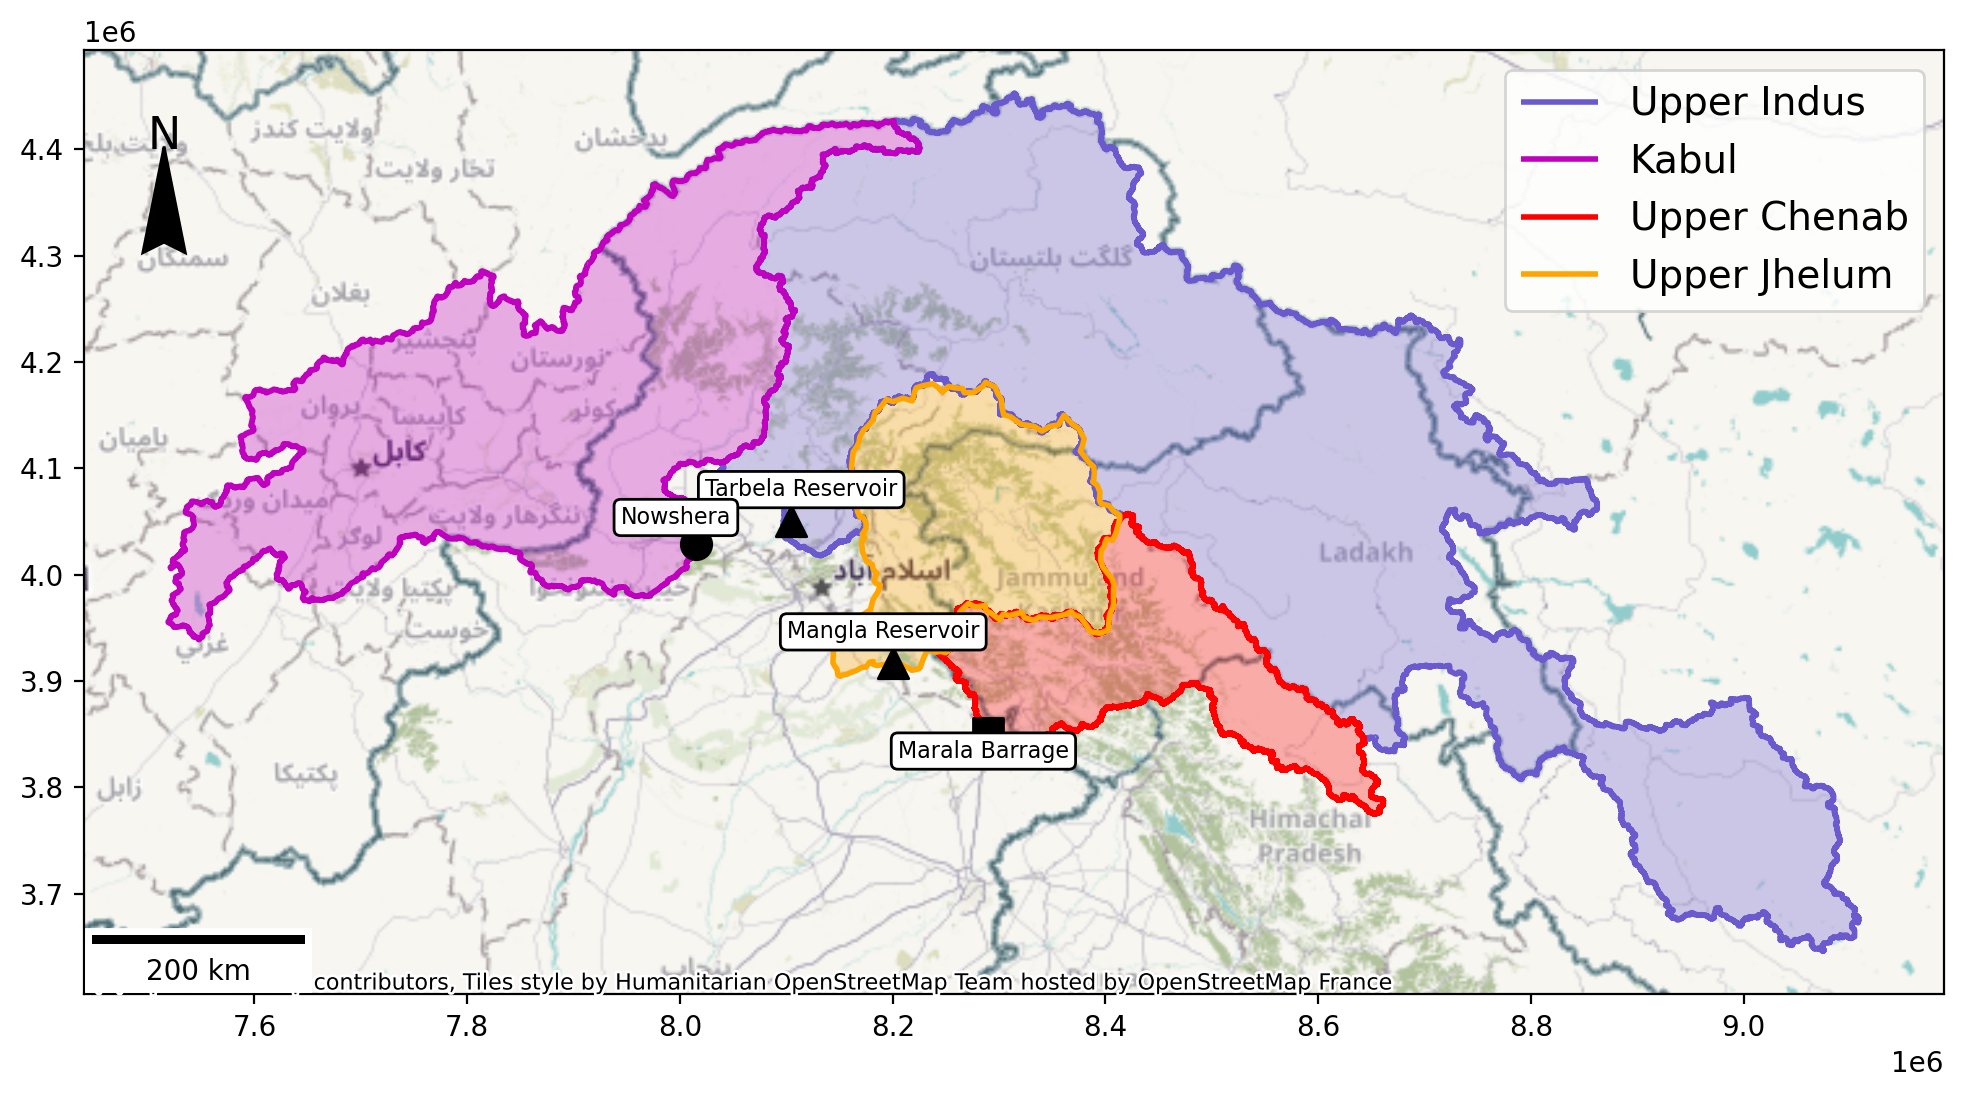

In [4]:
## Basin Data Loading
river_name = 'Chenab'
shape_name= 'Chenab_30m_New'
path = './shapefiles/' + river_name + '/' + shape_name + '.shp'
gdf_chenab = gpd.read_file(path)
gdf_chenab = gdf_chenab.to_crs(epsg=3857)

river_name = 'Jhelum'
shape_name= 'newmangla'
path = './shapefiles/' + river_name + '/' + shape_name + '.shp'
gdf_jhelum = gpd.read_file(path)
gdf_jhelum = gdf_jhelum.to_crs(epsg=3857)

river_name = 'Indus'
shape_name= 'UIB_30m_New'
path = './shapefiles/' + river_name + '/' + shape_name + '.shp'
gdf_indus = gpd.read_file(path)
gdf_indus = gdf_indus.to_crs(epsg=3857)

river_name = 'Kabul'
shape_name= 'krbshape'
path = './shapefiles/' + river_name + '/' + shape_name + '.shp'
gdf_kabul = gpd.read_file(path)
gdf_kabul = gdf_kabul.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
gdf_indus.plot(ax=ax, alpha=0.3, color='slateblue')
gdf_indus.boundary.plot(ax=ax, color='slateblue', linewidth=2, label='Upper Indus')
gdf_kabul.plot(ax=ax, alpha=0.3, color='m')
gdf_kabul.boundary.plot(ax=ax, color='m', linewidth=2, label='Kabul')
gdf_chenab.plot(ax=ax, alpha=0.3, color='r')
gdf_chenab.boundary.plot(ax=ax, color='r', linewidth=2, label='Upper Chenab')
gdf_jhelum.plot(ax=ax, alpha=0.3, color='orange')
gdf_jhelum.boundary.plot(ax=ax, color='orange', linewidth=2, label='Upper Jhelum')

bbox = dict(boxstyle="round", fc='white')
gdf_marala.plot(ax=ax, color='k', marker = 's', markersize=120, zorder=2)
gdf_marala.apply(lambda x: ax.annotate(text=x.NETNODEIBM, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, xytext = (-5,-25), textcoords='offset pixels',color='k', bbox=bbox),axis=1)
#ax.text(74, 32, 'wo', fontsize=8)
# Add labels to the markers
#gdf_marala.apply(annotate_point, ax=m.ax, axis=1)
gdf_mangla.plot(ax=ax, color='k', marker = '^', markersize=120, zorder=2)




gdf_mangla.apply(lambda x: ax.annotate(text=x.NETNODEIBM, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, xytext = (-10,25), textcoords='offset pixels',color='k', bbox=bbox),axis=1)
gdf_tarbela.plot(ax=ax, color='k', marker = '^', markersize=120, zorder=2)
gdf_tarbela.apply(lambda x: ax.annotate(text=x.NETNODEIBM, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, xytext = (10,25), textcoords='offset pixels',color='k', bbox=bbox),axis=1)
gdf_nowshera.plot(ax=ax, color='k', marker = 'o', markersize=120, zorder=2)
gdf_nowshera.apply(lambda x: ax.annotate(text=x.NETNODEIBM, xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, xytext = (-20,20), textcoords='offset pixels',color='k', bbox=bbox),axis=1)
ctx.add_basemap(ax)
#ax.set_title(label='Study Area', fontsize=20)
ax.legend(fontsize=14)

ax.text(x=7500000, y=4400000, s='N', fontsize=16)
ax.arrow(7515000, 4400000, 0, 2500, length_includes_head=True,
             head_width=40000, head_length=100000, overhang=.1, facecolor='k')

scale_bar = ScaleBar(1.0, units="m", location="lower left")
fig.gca().add_artist(scale_bar)

plt.savefig('study_area.pdf', bbox_inches='tight')
